
# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 30</p>
## <p style="text-align: center;">Due: Tuesday, Jan 31, 2017, submitted via Canvas by 11:59 pm</p>



# Question 1: Applications of Data Mining (5 pts)

Find a technical article/publication of your interest (published in 2015 or later) that uses data mining for some engineering application and provide the citation.

1. (2 pts) What problem was addressed  and how did the data mining approach help solve the problem?
2. (3 pts) Which data mining (regression/classification/etc) model(s) was used in the article?  What were the criteria used in selecting the model?


## Answer
Paper: A Data Mining Application on Moving Object Data

Citation: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7829757

1. This article is about how to analyze the data collected from moving objects, like mobile devices, vehicles and people. Data mining is used to find a certain route pattern.

2. This article introduces a model called MOD(moving object data) model and the criteria used is the length of common route.

# Question 2: Maximum Likelihood Estimation (5 pts)

Consider the following discrete univariate probability distribution involving a single parameter $\lambda$.

$$P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}, ~~~ k = 0, 1, 2, \ldots , $$, and zero elsewhere.

Given N data points $x_1, x_2, \ldots x_N$ drawn i.i.d. from this distribution, derive the MLE estimate for $\lambda$, in terms of $x_1, x_2, \ldots x_N$.

## Answer
The logarithm of the likehood function is:

$$L(\lambda) = log\prod\limits_{i=1}^n f(x_i ~|~ \lambda) = \sum\limits_{i=1}^n log(\frac{e^{-\lambda}\lambda^{x_i}}{x_i !}) = -n\lambda + (\sum\limits_{i=1}^n x_i)log(\lambda) - \sum\limits_{i=1}^n log(x_i !)$$

To maximize the likelihood distribution, we take the derivative of it:
$$ \frac{d}{d\lambda}L(\lambda) = 0 $$
$$ \frac{1}{\lambda}(\sum\limits_{i=1}^n x_i) = n $$
The result will be:
$$ \lambda =  \frac{\sum\limits_{i=1}^n x_i}{n}$$


# Question 3: Illustrating the "Curse of Dimensionality" (6 pts)

Consider a hypersphere of radius $a$ in $d$ dimensions, circumscribed in a hypercube with sides of length $2a$.
The ratio of the volume of a hypersphere to the the volumn of a hypercube is given by,

$$f = \frac{\text{volume of sphere}}{\text{volume of cube}} = \frac{\pi^{d/2}}{d2^{d-1}\Gamma(d/2)}$$

When $x$ is large, the gamma function $\Gamma$ can be approximated by the Stirling's approximation as follows.

$$\Gamma(x+1) \simeq (2\pi )^{1/2}e^{-x}x^{x+1/2} $$

a. (3 pts) Calculate the ratio $f$ for the cases $d$ = 10 and 100.  Note that for integers, $i, \Gamma(i) = (i-1)!$, so you don't need to use Stirling's approximation. 

b. (3 pts) What do your results say about where the volume is concentrated at in  high dimensional hypercubes? 

## Answer

a. 

For the case $d$ = 10, $$f = \frac{\pi^{5}}{10\cdotp2^{9}\cdotp4!} = 0.0025$$
For the case $d$ = 100, $$f = \frac{\pi^{50}}{100\cdotp2^{99}\cdotp49!} \approx 0$$

b. As d increases, the ratio of the volume of a hypersphere to the volume of a hypercube decreases sharply. Finally, the ratio will become zero.

# Question 4: Multiple Linear Regression in Python (14 pts)

Use the following code to import the diabetes dataset and generalized linear models in python.

In [7]:
%matplotlib inline
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows. (Use shape and head commands in python). 

b. (2 pts) Visualize the relationship between the first four features (age, sex, body mass index, average blood pressure) and the response variable using scatterplots.  Comment on the fits.

c.  (3 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (442 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

d.  (4 pts) Split the data into a training set and a test set.  Use the first 300 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

e.  (3 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

## Answer


In [8]:
# a.
diabetes = datasets.load_diabetes()
data = diabetes.data
print diabetes.data.shape
iris = pd.DataFrame(diabetes.data)
print iris.head(5)

(442, 10)
          0         1         2         3         4         5         6  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

          7         8         9  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


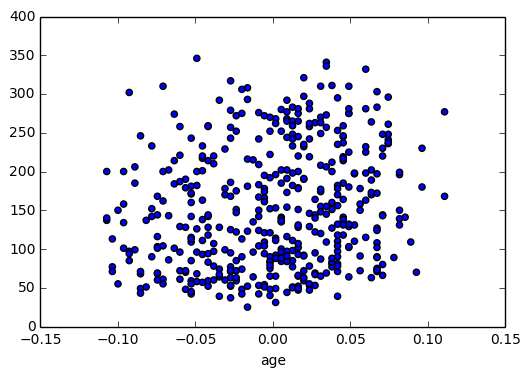

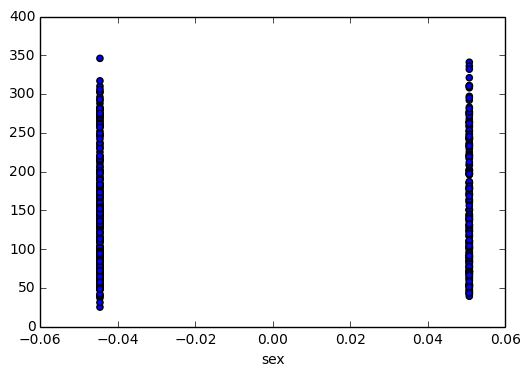

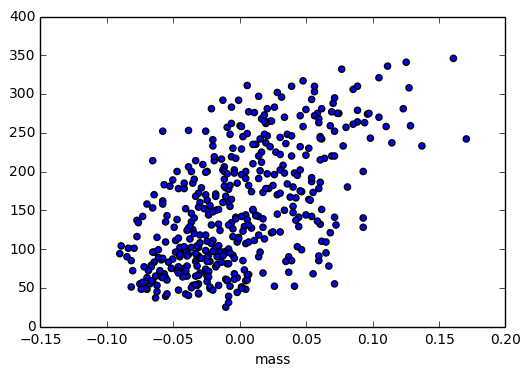

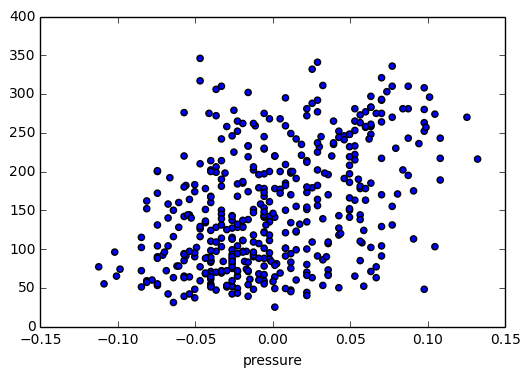

In [11]:
# b.
age = data[:,0]
sex = data[:,1]
mass = data[:,2]
pressure = data[:,3]
target = diabetes.target

plt.scatter(age,target)
plt.xlabel("age")
plt.show()

plt.scatter(sex,target)
plt.xlabel("sex")
plt.show()

plt.scatter(mass,target)
plt.xlabel("mass")
plt.show()

plt.scatter(pressure,target)
plt.xlabel("pressure")
plt.show()

In [12]:
# c.
regr = linear_model.LinearRegression()
regr.fit(data, diabetes.target)
print("Coefficients:")
print(regr.coef_)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(data) - diabetes.target) ** 2))

Coefficients:
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Mean squared error: 2859.69


In [13]:
# d.
# Split the data into training/testing sets
diabetes_X_train = data[:300]
diabetes_X_test = data[300:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:300]
diabetes_y_test = diabetes.target[300:]

regr.fit(diabetes_X_train, diabetes_y_train)
print("Mean squared error of the train part: %.2f"
      % np.mean((regr.predict(diabetes_X_train) - diabetes_y_train) ** 2))

print("Mean squared error of the test part: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

Mean squared error of the train part: 2923.00
Mean squared error of the test part: 2794.57


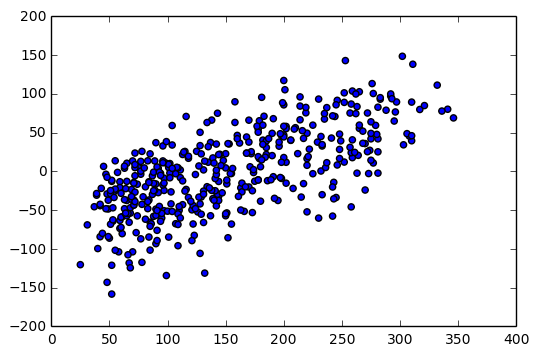

In [14]:
# e.
residual = diabetes.target - regr.predict(data)

plt.scatter(diabetes.target,residual)
plt.show()

If the dataset fits the linear model well, the distribution of residual should be random whitout related to the value of target(X axis). However, as the plot shows, when target is small, residual is negative;on the other hand, residual becomes positive when target is large. To be specific, the residual is in direct proportion to the value of target. So the dataset doesn't fit the linear model well. 